CONTEXTO: Soy parte de una empresa indie dedicada a desarrollar videojuegos, mi trabajo es analizar un dataset acerca de estos y poder determinar qué es lo que hace a un juego exitoso, ya sea por sus ventas, criticas, por la popularidad de su plataforma o bien si existe una cierta popularidad en el tipo de genero del videojuego.

INCOGNITAS A LAS CUALES QUIERO DAR RESPUESTA: ¿Hay una correlación entre las calificaciones y las ventas? ¿Hay algún género de juego que sea más exitoso que otros en términos de ventas? ¿Implica la plataforma en la que se juegan estos videojuegos?




In [32]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin


Las variables con las que voy a trabajar para dar respuesta a mis preguntas son: Name: Nombre del videojuego. Platform: Plataforma en la que se lanzó el video juego. Genre: Genero al que pertenece cada videojuego. Publisher: compañía a cargo de desarrollar el videojuego. Sales: Esta es más de una variable, ya que cuenta con varias columnas divididas según territorio y una global. Critic_Score: Puntaje de las críticas hacia el videojuego.



In [28]:

url = r"C:\Users\Admin\Desktop\DATA SCIENCE\DatasetsGame\Video_Games.csv"
DATA = pd.read_csv(url, low_memory=False)

DATA.dropna(subset=['Year_of_Release'], inplace=True)
DATA['Critic_Score'].fillna(0, inplace=True)


DATA['Year_of_Release'] = pd.to_datetime(DATA['Year_of_Release'], format='%Y', errors='coerce')

df = DATA.copy()
df = df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score']]

df['Year_of_Release'] = df['Year_of_Release'].dt.year

df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7983 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             7983 non-null   object        
 1   Platform         7983 non-null   object        
 2   Year_of_Release  7983 non-null   datetime64[ns]
 3   Genre            7983 non-null   object        
 4   Publisher        7982 non-null   object        
 5   NA_Sales         7983 non-null   float64       
 6   EU_Sales         7983 non-null   float64       
 7   JP_Sales         7983 non-null   float64       
 8   Other_Sales      7983 non-null   float64       
 9   Global_Sales     7983 non-null   float64       
 10  Critic_Score     7983 non-null   float64       
 11  Critic_Count     7983 non-null   float64       
 12  User_Score       7950 non-null   object        
 13  User_Count       6894 non-null   float64       
 14  Developer        7977 non-null   object

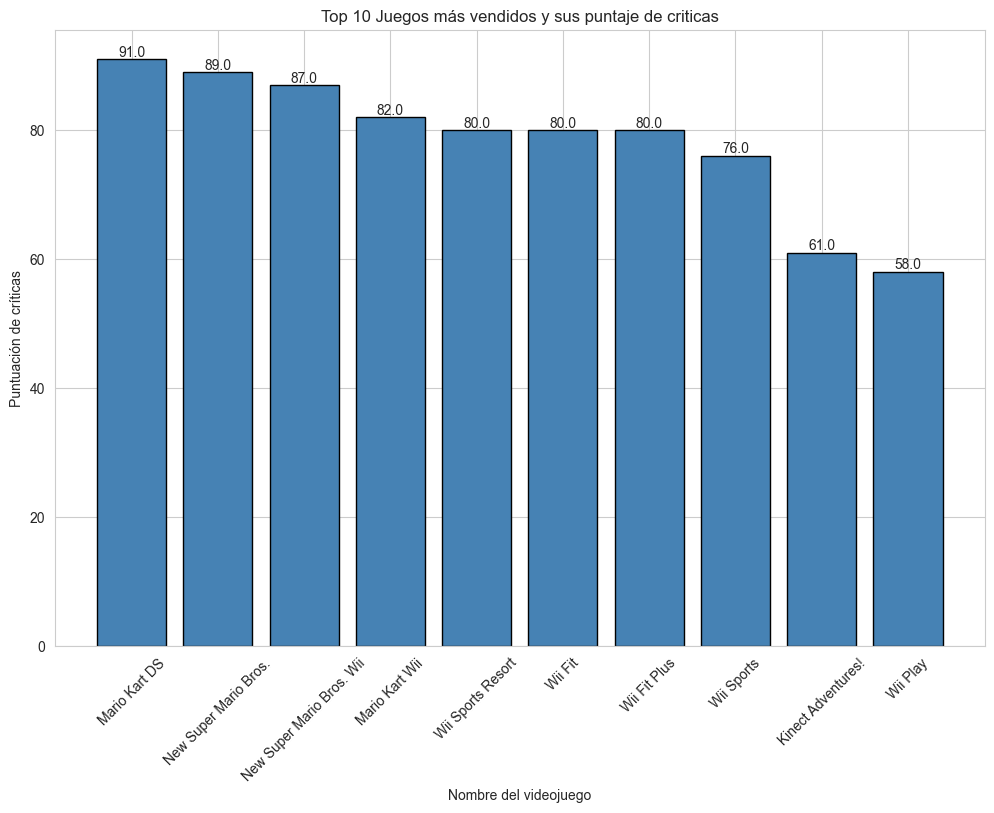

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

url = r"C:\Users\Admin\Desktop\DATA SCIENCE\DatasetsGame\Video_Games.csv"
DATA = pd.read_csv(url, low_memory=False)

DATA.dropna(subset=['Year_of_Release'], inplace=True)
DATA['Critic_Score'].fillna(0, inplace=True)

DATA['Year_of_Release'] = pd.to_datetime(DATA['Year_of_Release'], format='%Y', errors='coerce')

df = DATA.copy()
df = df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score']]
df = df[df['Critic_Score'] > 0]


top10_sales = df.nlargest(10, 'Global_Sales')
top10_critic_score = top10_sales[['Name', 'Critic_Score']].nlargest(10, 'Critic_Score')

plt.figure(figsize=(12, 8))

bars = plt.bar(top10_critic_score['Name'], top10_critic_score['Critic_Score'], color='steelblue', edgecolor='black')

plt.xlabel('Nombre del videojuego')
plt.ylabel('Puntuación de críticas')
plt.title('Top 10 Juegos más vendidos y sus puntaje de criticas')

plt.xticks(rotation=45) 

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.show()


In [19]:
model1 = 'Global_Sales~Critic_Score'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     511.1
Date:                Thu, 18 May 2023   Prob (F-statistic):          9.85e-110
Time:                        17:58:52   Log-Likelihood:                -15909.
No. Observations:                7983   AIC:                         3.182e+04
Df Residuals:                    7981   BIC:                         3.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5332      0.100    -15.259   

¿Hay una correlación entre las calificaciones y las ventas?
En primera instancia, observando el grafico de barras, no podríamos determinar si el factor de una gran calificación determina el número de ventas. Podemos ver que dentro del top 10 de videojuegos más vendidos no se encuentras las mejores calificaciones, mucho menos viendo que hay videojuegos con una calificación de 61 o 58 de 100. Por otro lado, si realizamos una regresión lineal de las variables, se puede hacer el siguiente análisis:

•	Si observamos el R-squared podemos ver que tiene un valor del 6%, un valor bajo de R-squared sugiere que las críticas por sí solas no son un predictor fuerte de las ventas.

•	Si observamos el COEFICIENTE el intercepto de la regresión es -1.5332, lo que indica el valor esperado de las ventas mundiales cuando las críticas son cero. El coeficiente de las criticas (Critic_Score) es 0.0323, lo que indica que por cada unidad adicional en las criticas, se espera un aumento de 0.0323 en las ventas mundiales.

En conclusión, se puede determinar que las criticas poseen una influencía en las ventas, aunque el R-squared es bajo y por lo tanto no puede explicar bien su variabilidad en las ventas.


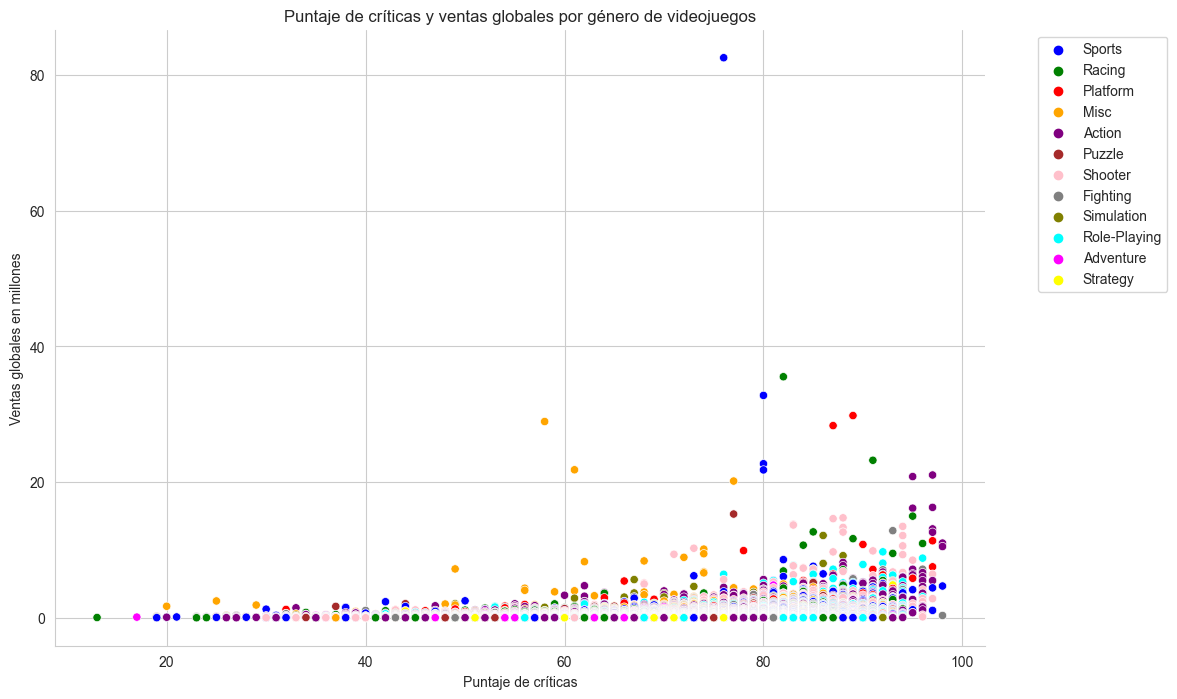

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

DATA.dropna(subset=['Year_of_Release'], inplace=True)
DATA['Critic_Score'].fillna(0, inplace=True)

df = DATA.copy()  

df = df[df['Global_Sales'] > 0]
df = df[df['Critic_Score'] > 0]

colores = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Critic_Score', y='Global_Sales', hue='Genre', palette=colores)
sns.set_style("whitegrid")
sns.despine()
plt.title('Puntaje de criticas y ventas globales por genero de videojuegos')
plt.xlabel('Puntaje de criticas')
plt.ylabel('Ventas globales en millones')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [42]:
model1 = 'Global_Sales~Genre+Critic_Score'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     48.65
Date:                Thu, 18 May 2023   Prob (F-statistic):          5.70e-113
Time:                        20:07:29   Log-Likelihood:                -15875.
No. Observations:                7983   AIC:                         3.178e+04
Df Residuals:                    7970   BIC:                         3.187e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.52

¿Hay algún género de juego que sea más exitoso que otros en términos de ventas?

Analizando el grafico de puntos, a simple vista (SIN TENER EN CUENTA EL OUTLIER POR ENCIMA DE LAS 80 MILLONES) no se puede determinar si existe alguna implicancia en el género porque no hay alguno que se destaque por encima de los demás.
En cuanto, si realizamos una regresión lineal, los resultados indican que el genero del videojuego tiene cierta influencia en las ventas globales, R-squared = 6.8% . Sin embargo, los coeficientes estimados y los p-valores indican que no todos los géneros tienen un impacto significativo en las ventas globales. Por ejemplo, los géneros "Misc" y "Role-Playing" parecen tener un efecto positivo significativo en las ventas globales, mientras que el género "Strategy" tiene un efecto negativo significativo. Además, la puntuación de criticos también muestra una relación significativa con las ventas globales, con un coeficiente positivo de 0.0330, lo que implica que un aumento en la puntuación de críticos está asociado con un aumento en las ventas globales.

En conclusión, este análisis explica una parte pequeña de la variabilidad y sugiere que existen otros factores importantes mas allá del género del videojuego.





In [41]:
model1 = 'Global_Sales~Platform'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     13.60
Date:                Thu, 18 May 2023   Prob (F-statistic):           7.54e-37
Time:                        20:07:27   Log-Likelihood:                -16049.
No. Observations:                7983   AIC:                         3.213e+04
Df Residuals:                    7966   BIC:                         3.225e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7497      0.140  

Interpretación general, los resultados indican que algunas plataformas de videojuegos tienen una relación significativa con las ventas globales, mientras que otras no. Por ejemplo, las plataformas "PS" y "Wii" muestran un efecto positivo significativo en las ventas globales, lo que implica que los videojuegos lanzados en estas plataformas tienden a tener mayores ventas. Por otro lado, las plataformas como "DC", "DS", "GBA", "GC", "PSP", y "PSV" tienen coeficientes negativos, lo que indica que los videojuegos lanzados en estas plataformas tienden a tener menores ventas. Sin embargo, es importante tener en cuenta que algunos p-valores están por encima del nivel de significancia típico de 0.05, lo que sugiere que la relación entre esas plataformas específicas y las ventas globales puede no ser estadísticamente significativa.

En conclusión, la regresión muestra que algunas plataformas se ven afectadas por las ventas globales, pero en general el modelo no logra dar una respuesta concreta a la totalidad del modelo.


CONCLUSION FINAL: En todos los modelos se llegó a una conclusión similar, en que si todos los factores que se analizaron llegaron a un resultado significativo. Faltaría estudiar más a fondo cada incógnita y de manera más especifica, ya que poner en comparación a videojuegos creados en el año 1980 y comparar con videojuegos actuales no tiene sentido.
La tecnología cambio, las plataformas cambiaron y los gustos de los consumidores cambiaron.

